In [2]:
from dolfin import *
import numpy as np

In [3]:
# Definim una quadrícula 10x10 en un domini [0,1]x[0,1]
mesh = UnitSquareMesh(10, 10)
V = FunctionSpace(mesh, "Lagrange", 1)

In [4]:
# Definim les funcions de  l'equació variacional, on x=x[0] i y=x[1]
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("6*x[0]*x[1]*(1-x[1])-2*x[0]*x[0]*x[0]", degree=2)
a = inner(grad(u), grad(v))*dx
L = f*v*dx

In [5]:
# Definim les condicions de contorn, primer a l'esquerra i després a la dreta
def left_boundary(x):
    return x[0] < DOLFIN_EPS

u_L = Constant(0.0)
Gamma_L = DirichletBC(V, u_L, left_boundary)


def right_boundary(x):
    return x[0] > 1.0 - DOLFIN_EPS

u_R = Expression("x[1]*(1-x[1])", degree=2)
Gamma_R = DirichletBC(V, u_R, right_boundary)

# Recollim les dues condicions en una llista
bcs = [Gamma_L, Gamma_R]

In [6]:
# Resolem el problema
u = Function(V)
solve(a == L, u, bcs)

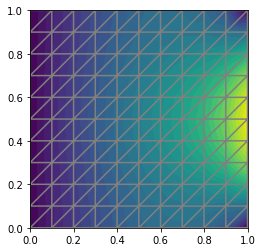

In [7]:
# Fem un plot de la solució
import matplotlib.pyplot as plt
plot(u)
plot(mesh)
plt.show()

In [9]:
# Càlcul de l'error sabent que la solució analítica és u_a(x,y)=y(1-y)x^3
V2 = FunctionSpace(mesh, "Lagrange", 2)
u_a = Expression("x[1]*(1-x[1])*x[0]*x[0]*x[0]",degree=3)
u_a_V2 = interpolate(u_a,V2)
error = (u-u_a_V2)**2*dx
E = sqrt(assemble(error))